In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("userbehaviour.csv")
data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [3]:
print(f'Average Screen Time = {data["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {data["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {data["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


In [4]:
print(f'Average Spend of the Users = {data["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {data["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {data["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


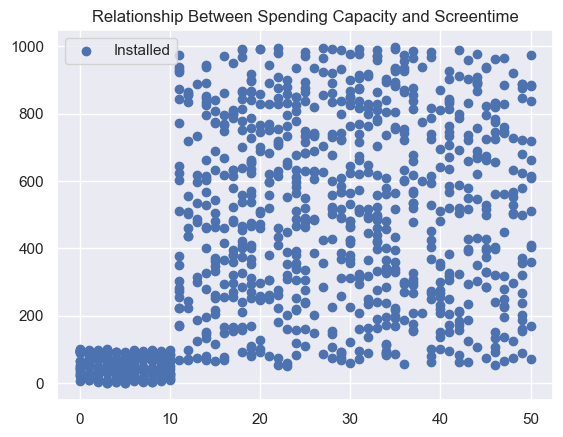

In [12]:
plt.scatter(x=data["Average Screen Time"],y=data ["Average Spent on App (INR)"])
plt.title("Relationship Between Spending Capacity and Screentime")
plt.legend(data['Status'])
plt.show()

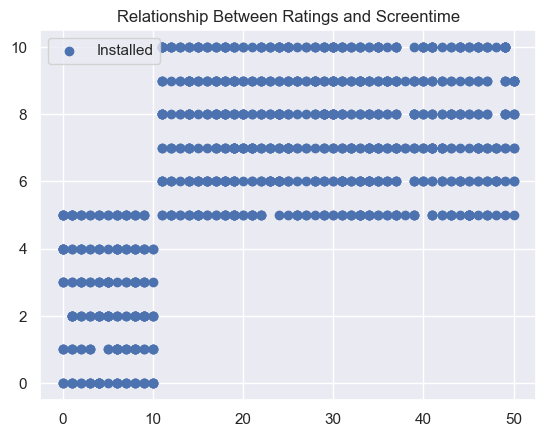

In [13]:
plt.scatter(x=data["Average Screen Time"],y=data["Ratings"])
plt.title("Relationship Between Ratings and Screentime")
plt.legend(data['Status'])
plt.show()

In [14]:
clustering_data = data[["Average Screen Time", "Left Review","Ratings", "Last Visited Minutes","Average Spent on App (INR)","New Password Request"]]

from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
data["Segments"] = clusters

print(data.head(10))

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   
5    1006                 28.0                       599.0            0   
6    1007                 49.0                       887.0            1   
7    1008                  8.0                        31.0            0   
8    1009                 28.0                       741.0            1   
9    1010                 28.0                       524.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Segments  
0        9                     7                  2990    Installed         0  
1        4    

In [15]:
data["Segments"].value_counts()

Segments
0    910
1     45
2     44
Name: count, dtype: int64

In [16]:
data["Segments"] = data["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})

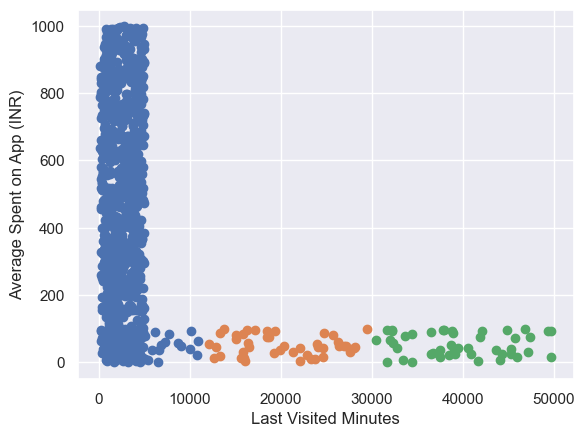

In [18]:
for i in list(data["Segments"].unique()):
    plt.scatter(x = data[data["Segments"]== i]['Last Visited Minutes'],y = data[data["Segments"] == i]['Average Spent on App (INR)'])

    
plt.plot(width = 800, height = 800, autosize = True)
plt.ylabel('Average Spent on App (INR)')
plt.xlabel('Last Visited Minutes')
plt.show()

### Summary

The blue segment shows the segment of users the app has retained over time. The red segment indicates the segment of users who just uninstalled the app or are about to uninstall it soon. And the green segment indicates the segment of users that the application has lost.